In [57]:
#Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import numpy as np
import scipy.stats as st

In [58]:
data_path = "Resources/FullDataSet.csv"

data_df = pd.read_csv(data_path)
data_df.head()

,Date,Month Abbr,State,Number of Flights,Positive,Daily Positve Increase,Deaths,Daily Death Increase,Total Tested,Daily Test Increase
0,7/16/2020,Jul,Arizona,318,134613,3259,2492,58,748491,13307
1,7/16/2020,Jul,California,1225,356178,8544,7345,118,5915508,122232
2,7/16/2020,Jul,Colorado,634,38155,469,1601,7,514742,8614
3,7/16/2020,Jul,Florida,889,315775,13965,4782,156,2815618,79665
4,7/16/2020,Jul,Georgia,1819,131275,3441,3104,13,1178222,23239


In [59]:
#group Total state metrics (no date layer.) Just to see overall does it look like theres some type of correlation
total_df = data_df.groupby(['State'], as_index=False)[['Number of Flights','Daily Positve Increase','Daily Death Increase','Daily Test Increase']].sum()
total_df.head()

,State,Number of Flights,Daily Positve Increase,Daily Death Increase,Daily Test Increase
0,Arizona,44180,104528,3435,946285
1,California,178247,539231,10035,11690017
2,Colorado,80602,52536,476,1258520
3,Florida,88215,469970,11918,3129799
4,Georgia,196194,219925,4675,2252640


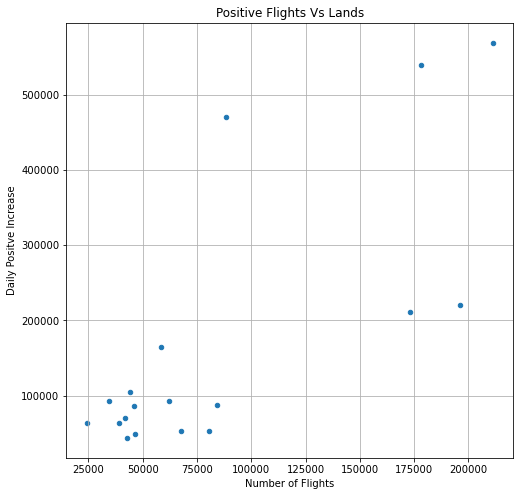

In [60]:
# Scatter plot of total flights to total positive cases
total_df.plot(kind="scatter", x="Number of Flights", y="Daily Positve Increase", grid=True, figsize=(8,8),
              title="Positive Flights Vs Lands")
plt.show()


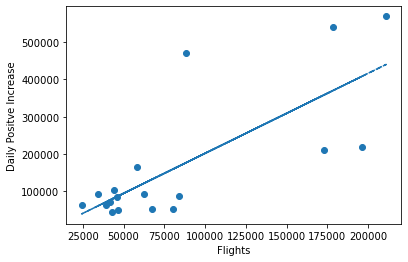

In [70]:
flights = total_df.iloc[:,1]
positive = total_df.iloc[:,2]

fl_slope, fl_int, fl_r, fl_p, fl_std_err = stats.linregress(flights, positive)
fl_fit = fl_slope * flights + fl_int

plt.scatter(flights,positive)
plt.plot(flights,fl_fit,"--")
#plt.xticks(np.arange(min(100), max(300000)))
plt.xlabel('Flights')
plt.ylabel('Daily Positve Increase')
plt.show()


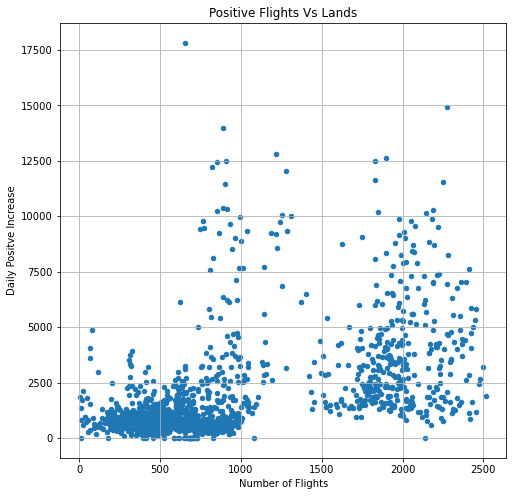

In [66]:
#Scatter plot utilizing each date as an individual instance across all states
data_df.plot(kind="scatter", x="Number of Flights", y="Daily Positve Increase", grid=True, figsize=(8,8),
              title="Positive Flights Vs Lands")
plt.show()

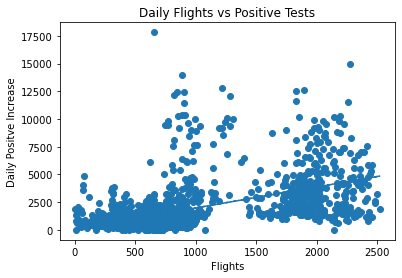

In [72]:
d_flights = data_df.iloc[:,3]
d_positive = data_df.iloc[:,5]

d_fl_slope, d_fl_int, d_fl_r, d_fl_p, d_fl_std_err = stats.linregress(d_flights, d_positive)
d_fl_fit = d_fl_slope * d_flights + d_fl_int

plt.scatter(d_flights,d_positive)
plt.plot(d_flights,d_fl_fit,"--")
plt.title('Daily Flights vs Positive Tests')
plt.xlabel('Flights')
plt.ylabel('Daily Positve Increase')
plt.show()

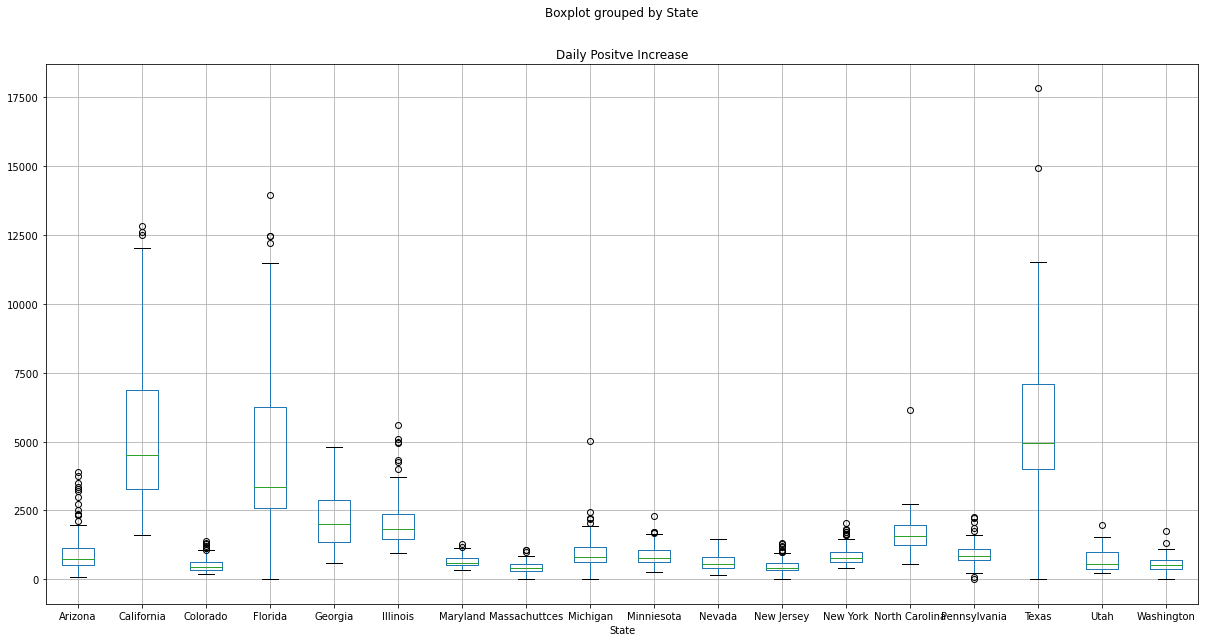

In [62]:
#BoxPlot Positive rates by state
data_df.boxplot("Daily Positve Increase", by="State", figsize=(20, 10))

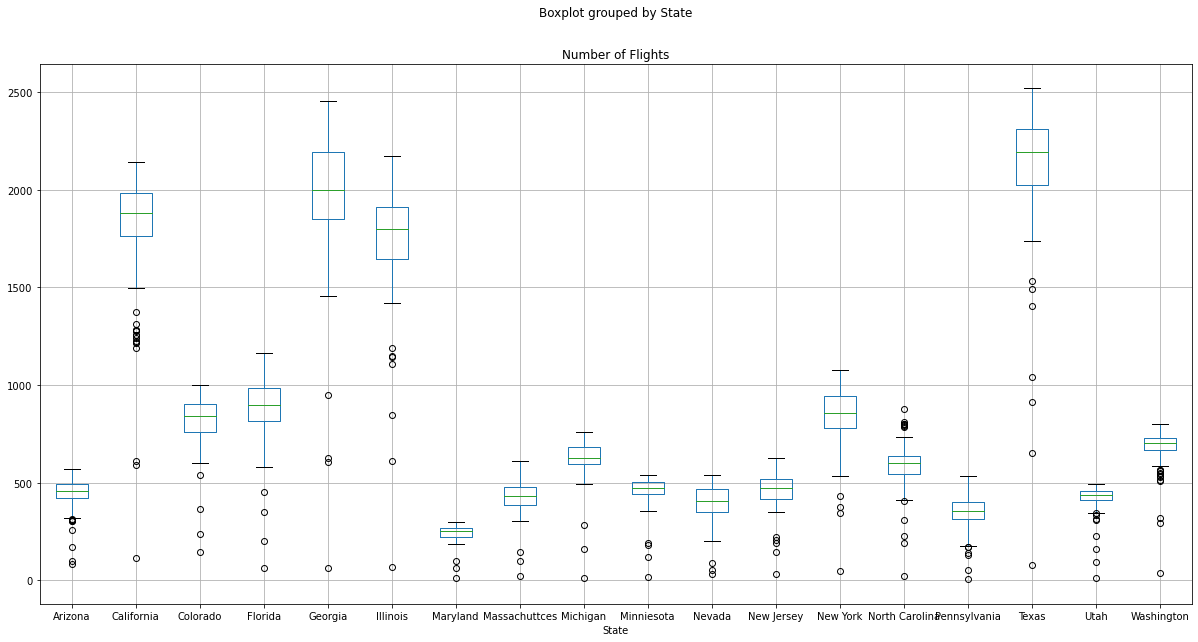

In [63]:
#BoxPlot flights by state
data_df.boxplot("Number of Flights", by="State", figsize=(20, 10))

In [64]:
#correlation of entire base dataset
data_desc = data_df.corr(method = 'pearson')
#data_desc.unstack().sort_values()
data_desc

,Number of Flights,Positive,Daily Positve Increase,Deaths,Daily Death Increase,Total Tested,Daily Test Increase
Number of Flights,1.000000,0.612506,0.555552,0.271990,0.493480,0.484964,0.430363
Positive,0.612506,1.000000,0.580096,0.678266,0.584707,0.823390,0.597891
Daily Positve Increase,0.555552,0.580096,1.000000,0.150774,0.741380,0.390682,0.477108
Deaths,0.271990,0.678266,0.150774,1.000000,0.163536,0.736683,0.580877
Daily Death Increase,0.493480,0.584707,0.741380,0.163536,1.000000,0.320984,0.293133
Total Tested,0.484964,0.823390,0.390682,0.736683,0.320984,1.000000,0.799839
Daily Test Increase,0.430363,0.597891,0.477108,0.580877,0.293133,0.799839,1.000000


In [73]:
#generating the correlation of the columns we actually care about
prep_df = data_df.groupby(['State','Date'], as_index=False)[['Number of Flights','Daily Positve Increase','Daily Death Increase','Daily Test Increase']].sum()
corr_pear = prep_df.corr(method = 'pearson')
corr_pear

,Number of Flights,Daily Positve Increase,Daily Death Increase,Daily Test Increase
Number of Flights,1.000000,0.555552,0.493480,0.430363
Daily Positve Increase,0.555552,1.000000,0.741380,0.477108
Daily Death Increase,0.493480,0.741380,1.000000,0.293133
Daily Test Increase,0.430363,0.477108,0.293133,1.000000


In [90]:
#Chi Test
critical_value = stats.chi2.ppf(q = 0.95, df = 1799)
critical_value

1898.7876765361684

In [88]:
#Chi Test
chi_data_path = "Resources/ChiTest.csv"
chi_df = pd.read_csv(chi_data_path)
stats.chisquare(chi_df['Daily Positve Increase'], chi_df['Expected Positives'])

Power_divergenceResult(statistic=2979814.425376921, pvalue=0.0)